In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [12]:
# PARAMETERS

save_to_disk = False # If set to True, figure will be saved to disk. Set to false if you don't want figure to be saved to disk.

In [13]:
E_fracs = np.load('Efracs_switching.npy') # E_frac values used in the single enocunter case

survival_fractions_full_curve = np.load(r"survival_fractions_switching_c_100.npy") # this is the single encounter case. Uses our analytical switching procedure
survival_fractions_Efrac_zeroPoint1_multiple_encounters_fixed_b_fixed_Efrac_switching = np.load(r"survival_fractions_Efrac_zeroPoint1_multiple_encounters_fixed_b_swtiching.npy") # multiple encounter case with incremental E_frac = 0.1
survival_fractions_Efrac_ten_multiple_encounters_fixed_b_fixed_Efrac_switching = np.load(r"survival_fractions_Efrac_ten_multiple_encounters_fixed_b_switching.npy") # multiple encounter case with incremental E_frac = 7.8

# Simulation data points from S2023; courtesy of Jacob Shen from the S2023 paper
S2023_Efrac_zeroPoint1 = np.genfromtxt(os.path.join('..', 'Data', r'S2023 Fig 9; Efrac = 0.1 case.dat'), dtype=None, delimiter='') 
S2023_Efrac_ten = np.genfromtxt(os.path.join('..', 'Data', r'S2023 Fig 9; Efrac = 7.8 case.dat'), dtype=None, delimiter='')

# Initialize the incremental E_frac values of successive stellar encounters
E_fracs_incremental_zeroPoint1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0]
E_fracs_incremental_ten = [7.8, 7.8*2, 7.8*3, 7.8*4, 7.8*5] #actually increments of E_frac of 7.8

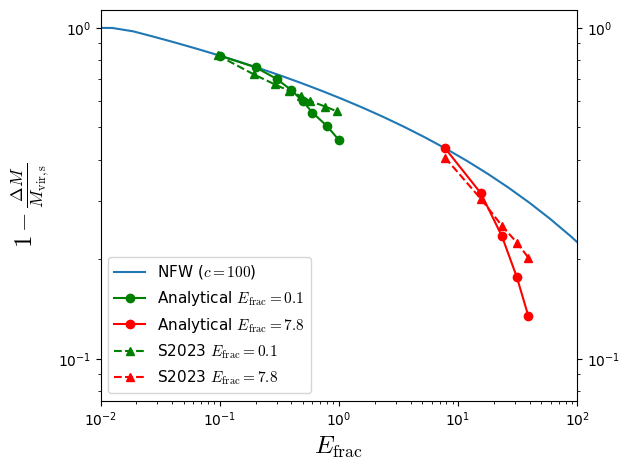

In [14]:
plt.rcParams["mathtext.fontset"] = "cm"

plt.loglog(E_fracs, survival_fractions_full_curve, label=r"NFW ($c=100$)")
plt.loglog(E_fracs_incremental_zeroPoint1, survival_fractions_Efrac_zeroPoint1_multiple_encounters_fixed_b_fixed_Efrac_switching, color="green", marker="o", label=r"Analytical $E_{\rm frac} = 0.1$")
plt.loglog(E_fracs_incremental_ten, survival_fractions_Efrac_ten_multiple_encounters_fixed_b_fixed_Efrac_switching, color="red", marker="o",  label=r"Analytical $E_{\rm frac} = 7.8$")

plt.loglog(S2023_Efrac_zeroPoint1[:,0], S2023_Efrac_zeroPoint1[:,1], color="green", marker="^", linestyle="dashed", label=r"S2023 $E_{\rm frac} = 0.1$")
plt.loglog(S2023_Efrac_ten[:,0], S2023_Efrac_ten[:,1], color="red", marker="^", linestyle="dashed",  label=r"S2023 $E_{\rm frac} = 7.8$")

plt.tick_params(which="both", labelright=True, right=True)
plt.xlabel(r"$E_{\rm frac}$", fontsize=18)
plt.ylabel(r"$1 - \frac{\Delta M}{M_{\rm vir,s}}$", fontsize=18)
plt.xlim(10**(-2), 10**2)
plt.legend(fontsize = 11)
plt.tight_layout()
if save_to_disk:
    plt.savefig("Figure 10.pdf")
plt.show()